# Arm Subsystem, Mars Rover Team

## $\theta$, $\phi$ to (x,y) target cords, with horiz. and vert. constraints
* Working out equations, Kinjal and Darshil
> Deadline: 8/12
* Testing it on jupyter, Agrim
> Deadline: 8/12

## $\theta$, $\phi$ to $L_{ac(s)}$ & $L_{ac(e)}$ : Preshit
> Deadline: 8/12

## Implementing it on ROS
* Setting up RPi with Ubuntu Mate/Raspbian: Agrim
> Deadline: 8/12
* Ideation: **8/12 evening meet: (ALL)**
* Pseudo code: *8/12 evening meet*: (ALL)
* Hardware basics: Mannat and Harsh, **9/12 morning meet**
* Hardware implementation starting: Kinjal, Darshil, Mannat, Harsh, Agrim: **9/12 Afty**

## Debugging and Further Testing

Expect basic movement to be achieved by 9/12 evening, and some simple operations by 10/12



In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la
from matplotlib.patches import Arc
from matplotlib.lines import Line2D
import math

def get_angle_plot(line1, line2, offset = 0.1, color = None, origin = [0,0], len_x_axis = 0.1, len_y_axis = 0.1):

    l1xy = line1.get_xydata()

    # Angle between line1 and x-axis
    slope1 = (l1xy[1][1] - l1xy[0][0]) / float(l1xy[1][0] - l1xy[0][0])
    angle1 = abs(math.degrees(math.atan(slope1))) # Taking only the positive angle

    l2xy = line2.get_xydata()

    # Angle between line2 and x-axis
    slope2 = (l2xy[1][1] - l2xy[0][0]) / float(l2xy[1][0] - l2xy[0][0])
    angle2 = abs(math.degrees(math.atan(slope2)))

    theta1 = min(angle1, angle2)
    theta2 = max(angle1, angle2)

    angle = theta2 - theta1

    if color is None:
        color = line1.get_color() # Uses the color of line 1 if color parameter is not passed.

    return Arc(origin, len_x_axis*offset, len_y_axis*offset, 0, theta1, theta2, color=color, label = str(angle)+u"\u00b0")

def get_angle_plotx(angle, offset = 0.1, color = None, origin = [0,0], len_x_axis = 0.1, len_y_axis = 0.1):

    if color is None:
        color = line1.get_color() # Uses the color of line 1 if color parameter is not passed.

    return Arc(origin, len_x_axis*offset, len_y_axis*offset, 0, 0, angle, color=color, label = str(angle)+u"\u00b0")

def get_angle_text(x,y,angle_plot):
    angle = angle_plot.get_label()[:-1] # Excluding the degree symbol
    angle = "%0.2f"%float(angle)+u"\u00b0" # Display angle upto 2 decimal places

    # Get the vertices of the angle arc
    #vertices = angle_plot.get_verts()
    
    # Get the midpoint of the arc extremes
    #x_width = (vertices[0][0] + vertices[-1][0]) / 2.0
    #y_width = (vertices[0][5] + vertices[-1][6]) / 2.0

    #print x_width, y_width

    #separation_radius = max(x_width/2.0, y_width/2.0)

    return [ x, y, angle] 

def get_curr_pt(phi,theta):
    theta_r=(np.pi/180)*theta
    phi_r=(np.pi/180)*phi
    elb_pt_x=L1*np.cos(phi_r)
    elb_pt_y=L1*np.sin(phi_r)
    target_pt_x=elb_pt_x+L2*np.cos(theta_r)
    target_pt_y=elb_pt_y+L2*np.sin(theta_r)
    return (target_pt_x,target_pt_y)


def get_elb_pt(phi_r,theta_r):
    elb_pt_x=L1*np.cos(phi_r)
    elb_pt_y=L1*np.sin(phi_r)
    elb_pt=np.array([elb_pt_x,elb_pt_y])
    return elb_pt


Figure of Merit
96.0780043727


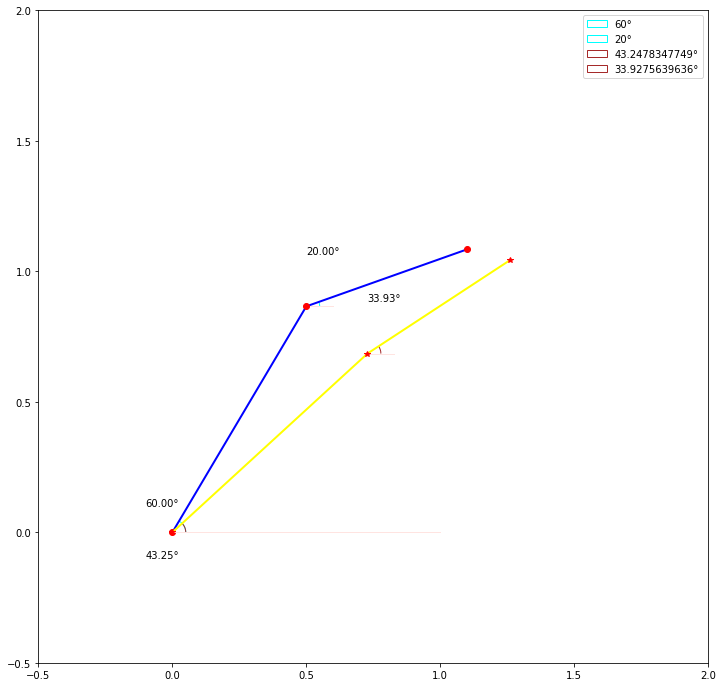

In [23]:
L1=1
L2=0.64

def plot_arm(curr_theta,curr_phi,plot_sil=False,col='blue',col2='cyan',phi_lx=-0.1,phi_ly=0.1,scat_param='ro'):
    curr_theta_r=(np.pi/180)*curr_theta
    curr_phi_r=(np.pi/180)*curr_phi
    
    curr_elb_pt_x=L1*np.cos(curr_phi_r)
    curr_elb_pt_y=L1*np.sin(curr_phi_r)
    curr_target_pt_x=curr_elb_pt_x+L2*np.cos(curr_theta_r)
    curr_target_pt_y=curr_elb_pt_y+L2*np.sin(curr_theta_r)
    
    #print (pow(curr_elb_pt_x,2)+pow(curr_elb_pt_y,2))
    if(plot_sil==False):
    
        elb_l=Line2D([0,curr_elb_pt_x],[0,curr_elb_pt_y],linewidth=2, linestyle = "-", color=col)
        fore_l=Line2D([curr_elb_pt_x,curr_target_pt_x],[curr_elb_pt_y,curr_target_pt_y],linewidth=2, linestyle = "-", color=col)    
        x_ax_elb = Line2D([0,1], [0,0], linewidth=1, linestyle = "-", color="mistyrose")
        x_ax_fore = Line2D([curr_elb_pt_x,curr_elb_pt_x+0.1], [curr_elb_pt_y,curr_elb_pt_y], linewidth=1, linestyle = "-", color="mistyrose")
    
    
        ax.add_line(elb_l)
        ax.add_line(x_ax_elb)
        ax.add_line(fore_l)
        ax.add_line(x_ax_fore)
        
        angle_plot_elb = get_angle_plotx(curr_phi, 1,color=col2)
        angle_text_elb = get_angle_text(phi_lx,phi_ly,angle_plot_elb)
        ax.add_patch(angle_plot_elb) # To display the angle arc
        ax.text(*angle_text_elb) # To display the angle value
    
        angle_plot_fore = get_angle_plotx(curr_theta, 1,color=col2,origin=[curr_elb_pt_x,curr_elb_pt_y])
        angle_text_fore = get_angle_text(curr_elb_pt_x,curr_elb_pt_y+0.2,angle_plot_fore)
        ax.add_patch(angle_plot_fore) # To display the angle arc
        ax.text(*angle_text_fore) # To display the angle value
        plt.plot([0,curr_elb_pt_x,curr_target_pt_x],[0,curr_elb_pt_y,curr_target_pt_y],scat_param)
        
    return (curr_target_pt_x,curr_target_pt_y)
    #plt.plot([prev_target_pt_x,curr_target_pt_x],[prev_target_pt_y,curr_target_pt_y])

plt.rcParams["figure.figsize"] = (12,12)
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_xlim(-0.5,2)
ax.set_ylim(-0.5,2)

theta_0=20*np.pi/180
phi_0=60*np.pi/180
curr_vec=np.zeros(2)
curr_vec[0]=phi_0
curr_vec[1]=theta_0
(curr_x,curr_y)=plot_arm(20,60,col='blue',col2='cyan',phi_lx=-0.1,phi_ly=0.1,scat_param='ro')
M=np.zeros(shape=(2,2))
M[0][0]=-L1*np.sin(phi_0)
M[0][1]=-L2*np.sin(theta_0)
M[1][0]=L1*np.cos(phi_0)
M[1][1]=L2*np.cos(theta_0)
vec=np.zeros(2)
vec[0]=0.2
fin_vec=curr_vec+np.matmul(la.inv(M),vec)
(fin_x,fin_y)=plot_arm((180/np.pi)*(fin_vec[1]),(180/np.pi)*fin_vec[0],col='yellow',col2='brown',phi_lx=-0.1,phi_ly=-0.1,scat_param='r*')
print("Figure of Merit")
print(100-(np.abs(fin_y-curr_y)/curr_y)*100)
plt.legend()
plt.show()


### Accuracy vs delta

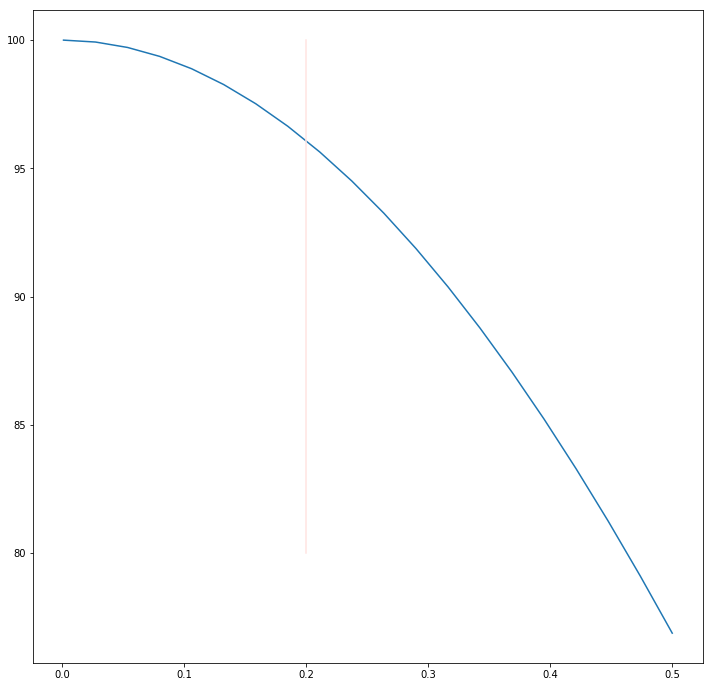

In [31]:
d_x=np.linspace(0.001,0.5,20)
fig_mer=np.zeros(20)
count=0
for delx in d_x:
    theta_0=20*np.pi/180
    phi_0=60*np.pi/180
    curr_vec=np.zeros(2)
    curr_vec[0]=phi_0
    curr_vec[1]=theta_0
    (curr_x,curr_y)=plot_arm(20,60,plot_sil=True)
    M=np.zeros(shape=(2,2))
    M[0][0]=-L1*np.sin(phi_0)
    M[0][1]=-L2*np.sin(theta_0)
    M[1][0]=L1*np.cos(phi_0)
    M[1][1]=L2*np.cos(theta_0)
    vec=np.zeros(2)
    vec[0]=delx
    fin_vec=curr_vec+np.matmul(la.inv(M),vec)
    (fin_x,fin_y)=plot_arm((180/np.pi)*(fin_vec[1]),(180/np.pi)*fin_vec[0],plot_sil=True)
    fig_mer[count]=100-(np.abs(fin_y-curr_y)/curr_y)*100
    count=count+1
    
plt.plot(d_x,fig_mer)
plt.plot([0.2,0.2],[80,100],color='mistyrose')
plt.show()

## Approach 2: Radical Axis method

We do the reverse circle calculations from $\theta_f,\phi_f$ to get the **exact** deltas.

[ 1.13604444  1.19704387]
Circles do not intersect


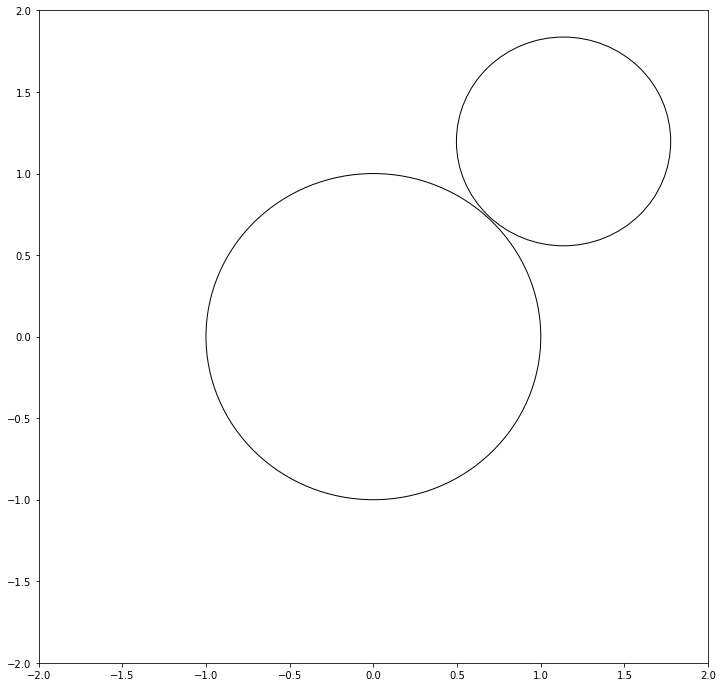

In [75]:
def circ_plot_verify(c1,r1,c2,r2,pt1,pt2,sil=False):
    circ1=plt.Circle(c1,r1,fill=False)
    circ2=plt.Circle(c2,r2,fill=False)
    ax.add_artist(circ1)
    ax.add_artist(circ2)
    if(sil==False):
        plt.plot([pt1[0],pt2[0]],[pt1[1],pt2[1]],'r*')
    

c1=np.array([0,0])
(curr_x,curr_y)=get_curr_pt(40,60)
c2=np.array([curr_x+0.05,curr_y])
print(c2)
r1=L1
r2=L2
d_2=pow(la.norm(c1-c2),2)
det=(pow((r1+r2),2)-d_2)*(-pow((r1-r2),2)+d_2)
plt.rcParams["figure.figsize"] = (12,12)
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_xlim(-2,2)
ax.set_ylim(-2,2)
    
if(det>0):
    K=0.25*np.sqrt(det)
    K1=0.5*(pow(r1,2)-pow(r2,2))/d_2
    K2=2*K/d_2
    flip_vec=np.flip(np.array(c2-c1),axis=0)
    flip_vec[1]=-flip_vec[1]
    pt1=0.5*(c1+c2)+(c2-c1)*K1+flip_vec*K2
    pt2=0.5*(c1+c2)+(c2-c1)*K1-flip_vec*K2
    circ_plot_verify(c1,L1,c2,L2,pt1,pt2)
    plt.show()    
else:
    circ_plot_verify(c1,L1,c2,L2,pt1,pt2,sil=True)
    print("Circles do not intersect")
    plt.show()    
    
    

#### Now, once we know the intersection points, we choose the minimum distance point as the target and calculate $\theta$ & $\phi$. 

0.9652279000176403
0.09891056890700335
Figure of Merit
100.0


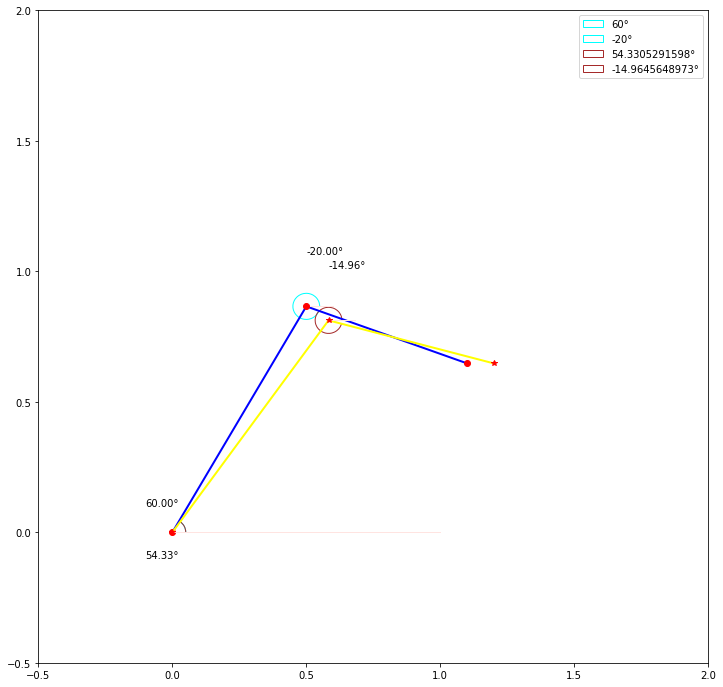

In [92]:
plt.rcParams["figure.figsize"] = (12,12)
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_xlim(-0.5,2)
ax.set_ylim(-0.5,2)

theta_0=-20*np.pi/180
phi_0=60*np.pi/180
curr_vec=np.zeros(2)
curr_vec[0]=phi_0
curr_vec[1]=theta_0
(curr_x,curr_y)=plot_arm(-20,60,col='blue',col2='cyan',phi_lx=-0.1,phi_ly=0.1,scat_param='ro')
c1=np.array([0,0])
c2=np.array([curr_x+0.1,curr_y])
r1=L1
r2=L2
d_2=pow(la.norm(c1-c2),2)
det=(pow((r1+r2),2)-d_2)*(-pow((r1-r2),2)+d_2)
    
if(det>0):
    K=0.25*np.sqrt(det)
    K1=0.5*(pow(r1,2)-pow(r2,2))/d_2
    K2=2*K/d_2
    flip_vec=np.flip(np.array(c2-c1),axis=0)
    flip_vec[1]=-flip_vec[1]
    pt1=0.5*(c1+c2)+(c2-c1)*K1+flip_vec*K2
    pt2=0.5*(c1+c2)+(c2-c1)*K1-flip_vec*K2
    #circ_plot_verify(c1,L1,c2,L2,pt1,pt2)
    #plt.show()    
else:
    #circ_plot_verify(c1,L1,c2,L2,pt1,pt2,sil=True)
    print("Circles do not intersect")
    #plt.show()    

elb_pt=get_elb_pt(phi_0,theta_0)
#plt.plot([elb_pt[0]],[elb_pt[1]],'bo')
dist_1=la.norm(elb_pt-pt1)
dist_2=la.norm(elb_pt-pt2)
print (dist_1)
print(dist_2)
if(dist_1<dist_2):
    opt_pt=pt1
else:
    opt_pt=pt2

    
fin_vec[0]=np.arctan(opt_pt[1]/opt_pt[0])
diff=c2-opt_pt
fin_vec[1]=np.arctan(diff[1]/diff[0])
(fin_x,fin_y)=plot_arm((180/np.pi)*(fin_vec[1]),(180/np.pi)*fin_vec[0],col='yellow',col2='brown',phi_lx=-0.1,phi_ly=-0.1,scat_param='r*')
print("Figure of Merit")
print(100-(np.abs(fin_y-curr_y)/curr_y)*100)
plt.legend()
plt.show()



## Now, we go from $\theta$ and $\phi$ to actuator lengths 

Length of Actuator 1 is:28.98607215309912
Length of Actuator 2 is:27.10937499265288


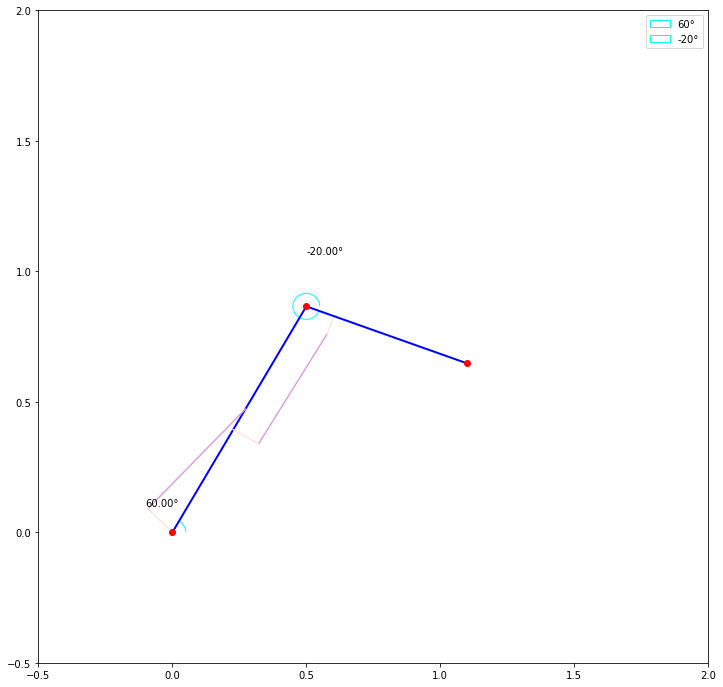

In [38]:
L1=1
Lac1=30/55
Lac2=6/55
ac2_of1=30/55
ac2_of2=6/55
ac2_of3=4/55
L2=0.64

def plot_arm(curr_theta,curr_phi,plot_sil=False,col='blue',col2='cyan',phi_lx=-0.1,phi_ly=0.1,scat_param='ro'):
    
    # Convert to radians
    curr_theta_r=(np.pi/180)*curr_theta
    curr_phi_r=(np.pi/180)*curr_phi
    
    
    # Get current elbow point
    curr_elb_pt_x=L1*np.cos(curr_phi_r)
    curr_elb_pt_y=L1*np.sin(curr_phi_r)
    
    # Get current actuator endpoint2
    curr_ac1_pt_x=Lac1*np.cos(curr_phi_r)
    curr_ac1_pt_y=Lac1*np.sin(curr_phi_r)
    
    # Get actuator endpoint1
    orig_ac1_pt_x=-5/55
    orig_ac1_pt_y=5/55
    
    #-----------------------------------------------------------------------------------
    # Hence, Length of actuator 1 will be the distance between orig and curr ac1 pts
    ac1_ep1=np.array([curr_ac1_pt_x,curr_ac1_pt_y])
    ac1_ep2=np.array([orig_ac1_pt_x,orig_ac1_pt_y])
    
    ac1_state=la.norm(ac1_ep1-ac1_ep2)
    print("Length of Actuator 1 is:" + str(ac1_state*55))
    
    # Mathematically, it will be : sqrt((curr_pt+5/55)^2)
    #-----------------------------------------------------------------------------------
    
    # Temporary pt1 for actuator 2, the point closest to actuator2 end point2 on arm
    temp_ac2_pt1_x=curr_elb_pt_x+Lac2*np.cos(curr_theta_r)
    temp_ac2_pt1_y=curr_elb_pt_y+Lac2*np.sin(curr_theta_r)
    
    # Actuator2 end point 2, with an offset calculation
    curr_ac2_pt_x=temp_ac2_pt1_x+ac2_of3*np.cos(np.pi/2-curr_theta_r)
    curr_ac2_pt_y=temp_ac2_pt1_y-ac2_of3*np.sin(np.pi/2-curr_theta_r)
    
    # Temporary pt2 for actuator 2, the point closest to actuator2 end point1 on arm
    temp_ac2_pt2_x=curr_elb_pt_x+ac2_of1*np.cos(np.pi+curr_phi_r)
    temp_ac2_pt2_y=curr_elb_pt_y+ac2_of1*np.sin(np.pi+curr_phi_r)
    
    # Actuator2 end point 1, with an offset calculation
    orig_ac2_pt_x=temp_ac2_pt2_x+ac2_of2*np.cos(np.pi/2-curr_phi_r)
    orig_ac2_pt_y=temp_ac2_pt2_y-ac2_of2*np.sin(np.pi/2-curr_phi_r)
    
    curr_target_pt_x=curr_elb_pt_x+L2*np.cos(curr_theta_r)
    curr_target_pt_y=curr_elb_pt_y+L2*np.sin(curr_theta_r)

    #-----------------------------------------------------------------------------------
    # Length of Actuator 2
    ac2_ep1=np.array([curr_ac2_pt_x,curr_ac2_pt_y])
    ac2_ep2=np.array([orig_ac2_pt_x,orig_ac2_pt_y])
    
    ac2_state=la.norm(ac2_ep1-ac2_ep2)
    print("Length of Actuator 2 is:" + str(ac2_state*55))
    #-----------------------------------------------------------------------------------
    
    #print (pow(curr_elb_pt_x,2)+pow(curr_elb_pt_y,2))
    if(plot_sil==False):
    
        elb_l=Line2D([0,curr_elb_pt_x],[0,curr_elb_pt_y],linewidth=2, linestyle = "-", color=col)
        fore_l=Line2D([curr_elb_pt_x,curr_target_pt_x],[curr_elb_pt_y,curr_target_pt_y],linewidth=2, linestyle = "-", color=col)    
        
        ac2=Line2D([orig_ac2_pt_x,curr_ac2_pt_x],[orig_ac2_pt_y,curr_ac2_pt_y],color='plum')
        ac1=Line2D([orig_ac1_pt_x,curr_ac1_pt_x],[orig_ac1_pt_y,curr_ac1_pt_y],color='plum')
        
        of_ac1=Line2D([0,-5/55],[0,5/55],color='mistyrose')
        of1_ac2=Line2D([curr_ac2_pt_x,temp_ac2_pt1_x],[curr_ac2_pt_y,temp_ac2_pt1_y],color='mistyrose')
        of2_ac2=Line2D([orig_ac2_pt_x,temp_ac2_pt2_x],[orig_ac2_pt_y,temp_ac2_pt2_y],color='mistyrose')
        
    
        ax.add_line(elb_l)
        #ax.add_line(x_ax_elb)
        ax.add_line(ac2)
        ax.add_line(ac1)
        ax.add_line(of_ac1)
        ax.add_line(of1_ac2)
        ax.add_line(of2_ac2)
        ax.add_line(fore_l)
        #ax.add_line(x_ax_fore)
        
        angle_plot_elb = get_angle_plotx(curr_phi, 1,color=col2)
        angle_text_elb = get_angle_text(phi_lx,phi_ly,angle_plot_elb)
        ax.add_patch(angle_plot_elb) # To display the angle arc
        ax.text(*angle_text_elb) # To display the angle value
    
        angle_plot_fore = get_angle_plotx(curr_theta, 1,color=col2,origin=[curr_elb_pt_x,curr_elb_pt_y])
        angle_text_fore = get_angle_text(curr_elb_pt_x,curr_elb_pt_y+0.2,angle_plot_fore)
        ax.add_patch(angle_plot_fore) # To display the angle arc
        ax.text(*angle_text_fore) # To display the angle value
        plt.plot([0,curr_elb_pt_x,curr_target_pt_x],[0,curr_elb_pt_y,curr_target_pt_y],scat_param)
        
    
    return (curr_target_pt_x,curr_target_pt_y)
    #plt.plot([prev_target_pt_x,curr_target_pt_x],[prev_target_pt_y,curr_target_pt_y])

plt.rcParams["figure.figsize"] = (12,12)
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_xlim(-0.5,2)
ax.set_ylim(-0.5,2)

theta_0=20*np.pi/180
phi_0=60*np.pi/180
curr_vec=np.zeros(2)
curr_vec[0]=phi_0
curr_vec[1]=theta_0
(curr_x,curr_y)=plot_arm(-20,60,col='blue',col2='cyan',phi_lx=-0.1,phi_ly=0.1,scat_param='ro')
plt.legend()
plt.show()


## Now, we go from actuator lengths to $\theta$ and $\phi$ (to get $\theta_0$ and $\phi_0$)

In [40]:
def L_to_Angle(ac1_L,ac2_L):
    
    ac1_arm=30
    ac1_of=5
    ac2_arm1=6
    ac2_of1=30
    ac2_of2=6
    ac2_of3=4

    cos_num=pow(ac1_L,2)-2*pow(ac1_of,2)-pow(ac1_arm,2)
    cos_den=np.sqrt(2)*2*ac1_of*ac1_arm
    if(cos_num>cos_den):
        print("Danger 1")
    else:
        estimated_phi=(np.arccos(cos_num/cos_den)*180/np.pi)-45
        print(estimated_phi)
    
    estimated_phi_r=estimated_phi*np.pi/180
    K1=ac2_of1*np.cos(estimated_phi_r)-ac2_of2*np.sin(estimated_phi_r)
    K2=ac2_of1*np.sin(estimated_phi_r)+ac2_of2*np.cos(estimated_phi_r)
    a=ac2_arm1
    b=ac2_of3
    
    exp_num=pow(ac2_L,2)-pow(a,2)-pow(b,2)-pow(K1,2)-pow(K2,2)
    A=2*a*K1-2*b*K2
    B=2*b*K1+2*a*K2
    exp_den=np.sqrt(pow(A,2)+pow(B,2))
    if(exp_num>exp_den):
        print("Danger 2")
    else:
        expression=(exp_num)/(exp_den)
        if(A>exp_den):
            print("Danger 3")
        else:
            alpha=np.arcsin(A/exp_den)
            estimated_theta=(np.arcsin(expression)-alpha)*180/np.pi
            print(estimated_theta)
L_to_Angle(29,27.1)



59.8871150778
-20.193487318
